In [16]:
# import warnings
# warnings.filterwarnings("ignore")

# Part 1
## Exploratory Data Analysis

In [17]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost

## Load the train dataset

In [29]:
df = pd.read_csv("raw/adult.0.train.csv", encoding='latin1', 
                 names=['age','workclass','fnlwgt','education',
                         'education_num','marital_status','occupation',
                         'relationship','race','sex','capital_gain','capital_loss',
                         'hours_per_week','native_country','income'],
                 na_values='?',
                 low_memory=False )

df.head(100)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,65,Private,170939,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Male,6723,0,40,United-States,<=50K
1,30,Private,96287,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,United-States,<=50K
2,21,Private,314182,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
3,19,Private,156618,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,1602,20,United-States,<=50K
4,30,Private,118056,Some-college,10,Married-spouse-absent,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,<=50K
5,57,Private,34366,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,<=50K
6,45,Private,173658,Some-college,10,Separated,Sales,Unmarried,White,Female,0,0,35,United-States,<=50K
7,55,State-gov,100285,Bachelors,13,Divorced,Adm-clerical,Not-in-family,White,Male,10520,0,40,United-States,>50K
8,56,Self-emp-not-inc,19896,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,60,United-States,>50K
9,17,Private,75333,10th,6,Never-married,Sales,Own-child,Black,Female,0,0,24,United-States,<=50K


In [18]:
test = pd.read_csv("raw/adult.0.test", encoding='latin1', 
                 names=['age','workclass','fnlwgt','education',
                         'education_num','marital_status','occupation',
                         'relationship','race','sex','capital_gain','capital_loss',
                         'hours_per_week','native_country','income'],
                 na_values='?',
                 low_memory=False)
test.head(100)

In [19]:
print(df.shape[0], 'rows and', df.shape[1], 'columns')

24421 rows and 15 columns


In [23]:
X_test = test.drop(['over_50k'], axis=1)
y_test = test.over_50k

# Convert to numeric

In [30]:
# Convert string to float
# names=['age','workclass','fnlwgt','education',
#                          'education_num','marital_status','occupation',
#                          'relationship','race','sex','capital_gain','capital_loss',
#                          'hours_per_week','native_country','income']
df.loc[:,'age'] = pd.to_numeric(df['age'], downcast='integer', errors='coerce')
df.loc[:,'fnlwgt'] = pd.to_numeric(df['fnlwgt'], downcast='float', errors='coerce')
df.loc[:,'age'] = pd.to_numeric(df['age'], downcast='integer', errors='coerce')
df.loc[:,'capital_gain'] = pd.to_numeric(df['capital_gain'], downcast='float', errors='coerce')
df.loc[:,'capital_loss'] = pd.to_numeric(df['capital_loss'], downcast='float', errors='coerce')
df.loc[:,'hours_per_week'] = pd.to_numeric(df['hours_per_week'], downcast='float', errors='coerce')

In [23]:
df.head(50)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,65,Private,170939.0,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Male,6723.0,0.0,40.0,United-States,<=50K
1,30,Private,96287.0,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0.0,0.0,45.0,United-States,<=50K
2,21,Private,314182.0,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
3,19,Private,156618.0,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0.0,1602.0,20.0,United-States,<=50K
4,30,Private,118056.0,Some-college,10,Married-spouse-absent,Exec-managerial,Unmarried,White,Female,0.0,0.0,45.0,United-States,<=50K
5,57,Private,34366.0,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
6,45,Private,173658.0,Some-college,10,Separated,Sales,Unmarried,White,Female,0.0,0.0,35.0,United-States,<=50K
7,55,State-gov,100285.0,Bachelors,13,Divorced,Adm-clerical,Not-in-family,White,Male,10520.0,0.0,40.0,United-States,>50K
8,56,Self-emp-not-inc,19896.0,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0.0,0.0,60.0,United-States,>50K
9,17,Private,75333.0,10th,6,Never-married,Sales,Own-child,Black,Female,0.0,0.0,24.0,United-States,<=50K


In [19]:
test.loc[:,'age'] = pd.to_numeric(df['age'], downcast='integer', errors='coerce')
test.loc[:,'fnlwgt'] = pd.to_numeric(df['fnlwgt'], downcast='float', errors='coerce')
test.loc[:,'age'] = pd.to_numeric(df['age'], downcast='integer', errors='coerce')
test.loc[:,'capital_gain'] = pd.to_numeric(df['capital_gain'], downcast='float', errors='coerce')
test.loc[:,'capital_loss'] = pd.to_numeric(df['capital_loss'], downcast='float', errors='coerce')
test.loc[:,'hours_per_week'] = pd.to_numeric(df['hours_per_week'], downcast='float', errors='coerce')

## Look at the distribution of the fnlwgt

In [24]:
df.loc[:,'fnlwgt'].describe()

count    2.442100e+04
mean     1.894930e+05
std      1.050367e+05
min      1.349200e+04
25%      1.176740e+05
50%      1.779370e+05
75%      2.378110e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

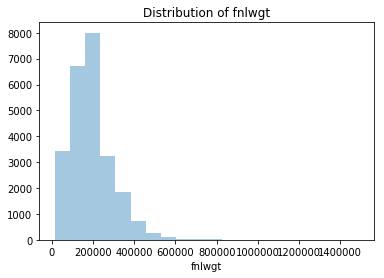

In [25]:
fig, ax = plt.subplots(1, 1)

g = sns.distplot(df.fnlwgt, kde=False, bins=20)

plt.xlabel('fnlwgt')
plt.title('Distribution of fnlwgt')
plt.show()

## Look at the distribution of education_num

In [26]:
df.education_num.describe()

count    24421.000000
mean        10.093895
std          2.565727
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: education_num, dtype: float64

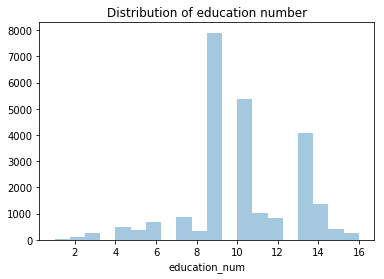

In [27]:
fig, ax = plt.subplots(1, 1)

g = sns.distplot(df.education_num, kde=False, bins=20)

plt.xlabel('education_num')
plt.title('Distribution of education number')
plt.show()

In [31]:
df.native_country.value_counts()

United-States                 21926
Mexico                          447
Philippines                     148
Germany                         100
Canada                           90
Puerto-Rico                      88
El-Salvador                      81
India                            79
Cuba                             74
Dominican-Republic               65
England                          63
China                            63
South                            60
Jamaica                          51
Italy                            50
Guatemala                        50
Poland                           46
Columbia                         45
Japan                            43
Haiti                            41
Vietnam                          41
Portugal                         31
Taiwan                           31
Iran                             27
Peru                             26
France                           22
Greece                           22
Ecuador                     

# Section 2:
## Modeling

# Feature Engineering

# Make over_50k as output features

In [32]:
features = df.copy()
features['over_50k'] = np.where(features.income == '>50K', 1, 0)
features=features.drop(['income'], axis=1)

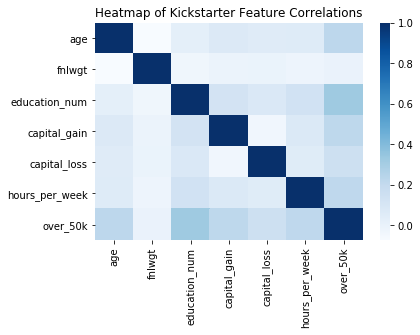

In [33]:
sns.heatmap(features.iloc[:, :20].corr(), cmap='Blues')

plt.title('Heatmap of Kickstarter Feature Correlations')
plt.show()

# Make  categorical with one-hot encoder

In [34]:
features = pd.get_dummies(features, columns=['workclass','education',
                         'marital_status','occupation',
                         'relationship','race','sex',
                         'native_country'], dummy_na=True)

In [ ]:
X = features.drop(['over_50k'], axis=1)
y = features.over_50k

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

In [36]:
features.head(10)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,over_50k,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,native_country_nan
0,65,170939.0,13,6723.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,30,96287.0,14,0.0,0.0,45.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,21,314182.0,9,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,19,156618.0,9,0.0,1602.0,20.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,30,118056.0,10,0.0,0.0,45.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,57,34366.0,10,0.0,0.0,50.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,45,173658.0,10,0.0,0.0,35.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,55,100285.0,13,10520.0,0.0,40.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,56,19896.0,10,0.0,0.0,60.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,17,75333.0,6,0.0,0.0,24.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Section 3: Tuning on training set

In [107]:
xgb = XGBClassifier(
    learning_rate =0.1,
    n_estimators=5000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    n_jobs=-1,
    scale_pos_weight=1,
    seed=27)

xgb_param = xgb.get_xgb_params()
xgtrain = xgboost.DMatrix(X, label=y)


xgboost.cv(xgb_param, xgtrain, num_boost_round=5000, nfold=5, metrics=['error'],
     early_stopping_rounds=50, stratified=True, seed=0)

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.149154,0.000667,0.151550,0.004728
1,0.148510,0.000598,0.150281,0.004214
2,0.147619,0.001763,0.149830,0.002937
3,0.145868,0.000861,0.147947,0.004223
4,0.145182,0.001067,0.147578,0.003869
5,0.144568,0.001556,0.147087,0.004157
6,0.144251,0.001332,0.146227,0.003477
7,0.144230,0.001271,0.146063,0.003209
8,0.144220,0.001426,0.145694,0.003588
9,0.143606,0.001630,0.145817,0.003405


# Tune max depth and min child weight

In [108]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
NUM_TRIALS = int(np.ceil(200000/features.shape[0]))
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
# Grid search 1 cv result
grid_score1 = pd.DataFrame()

# Loop for each trial
print('Run {} times'.format(NUM_TRIALS))
for i in range(NUM_TRIALS):
    xgb = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=8,
        scale_pos_weight=1,
        seed=0)
    five_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    gsearch1 = GridSearchCV(estimator = xgb,
                            param_grid = param_test1,
                            scoring='accuracy',n_jobs=-1,
                            cv=five_folds,
                            return_train_score=False)
    gsearch1.fit(X,y)    
    if grid_score1.empty:
        grid_score1 = pd.DataFrame(gsearch1.cv_results_, columns=['params', 'mean_test_score'])
        grid_score1.columns = ['params', 'mean_test_score_0']
    else:
        grid_score1['mean_test_score_{}'.format(i)] = pd.DataFrame(gsearch1.cv_results_).mean_test_score
    print('Run {} best param: '.format(i), gsearch1.best_params_)
    print('Run {} best score: '.format(i), gsearch1.best_score_)

grid_score1['avg'] = grid_score1.sum(axis=1)/NUM_TRIALS
print('Best params: ', grid_score1.loc[grid_score1.avg.idxmax(), :])

Run 9 times
Run 0 best param:  {'max_depth': 5, 'min_child_weight': 5}
Run 0 best score:  0.8711354981368494
Run 1 best param:  {'max_depth': 5, 'min_child_weight': 5}
Run 1 best score:  0.8702346341263667
Run 2 best param:  {'max_depth': 5, 'min_child_weight': 5}
Run 2 best score:  0.8707260144957208
Run 3 best param:  {'max_depth': 5, 'min_child_weight': 1}
Run 3 best score:  0.8708488595880595
Run 4 best param:  {'max_depth': 5, 'min_child_weight': 1}
Run 4 best score:  0.8704803243110437
Run 5 best param:  {'max_depth': 5, 'min_child_weight': 1}
Run 5 best score:  0.8703165308545924
Run 6 best param:  {'max_depth': 5, 'min_child_weight': 3}
Run 6 best score:  0.8705622210392695
Run 7 best param:  {'max_depth': 5, 'min_child_weight': 1}
Run 7 best score:  0.8708898079521723


/home/tai/.conda/envs/research/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Run 8 best param:  {'max_depth': 5, 'min_child_weight': 3}
Run 8 best score:  0.8696204086646738
Best params:  params               {'max_depth': 5, 'min_child_weight': 1}
mean_test_score_0                                   0.869948
mean_test_score_1                                   0.869866
mean_test_score_2                                   0.870153
mean_test_score_3                                   0.870849
mean_test_score_4                                    0.87048
mean_test_score_5                                   0.870317
mean_test_score_6                                   0.869375
mean_test_score_7                                    0.87089
mean_test_score_8                                   0.869334
avg                                                 0.870135
Name: 3, dtype: object


In [43]:
# Tune a 

In [26]:
param_test2 = {
 'max_depth':[4, 5, 6, 7, 8],
 'min_child_weight':[1, 2, 3]
}
# Loop for each trial
print('Run {} times'.format(NUM_TRIALS))
for i in range(NUM_TRIALS):
    five_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    gsearch2 = GridSearchCV(estimator = XGBClassifier(
        learning_rate =0.1,
        n_estimators=122,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27
    ), 
    param_grid = param_test2, scoring='accuracy',n_jobs=-1,iid=False, cv=five_folds)
    gsearch2.fit(X,y)
    print('Run {} best param: '.format(i), gsearch2.best_params_)
    print('Run {} best score: '.format(i), gsearch2.best_score_)

Run 9 times
Run 0 best param:  {'max_depth': 7, 'min_child_weight': 3}
Run 0 best score:  0.8705212516880889
Run 1 best param:  {'max_depth': 5, 'min_child_weight': 2}
Run 1 best score:  0.870234861268638
Run 2 best param:  {'max_depth': 5, 'min_child_weight': 3}
Run 2 best score:  0.8719547294572884
Run 3 best param:  {'max_depth': 6, 'min_child_weight': 1}
Run 3 best score:  0.8716676767956194
Run 4 best param:  {'max_depth': 6, 'min_child_weight': 1}
Run 4 best score:  0.8706031853012405
Run 5 best param:  {'max_depth': 5, 'min_child_weight': 2}
Run 5 best score:  0.8703982590574197
Run 6 best param:  {'max_depth': 6, 'min_child_weight': 3}
Run 6 best score:  0.8708487095078702
Run 7 best param:  {'max_depth': 6, 'min_child_weight': 3}
Run 7 best score:  0.8700298763451272
Run 8 best param:  {'max_depth': 7, 'min_child_weight': 2}
Run 8 best score:  0.8704394605827563


# Tuning gamma

In [28]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
print('Run {} times'.format(NUM_TRIALS))
for i in range(NUM_TRIALS):
    five_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    gsearch3 = GridSearchCV(estimator = XGBClassifier(
        learning_rate =0.1,
        n_estimators=122,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27
    ), 
    param_grid = param_test3, scoring='accuracy',n_jobs=-1,iid=False, cv=five_folds)
    gsearch3.fit(X,y)
    print('Run {} best param: '.format(i), gsearch3.best_params_)
    print('Run {} best score: '.format(i), gsearch3.best_score_)

Run 9 times
Run 0 best param:  {'gamma': 0.4}
Run 0 best score:  0.8700708012376385
Run 1 best param:  {'gamma': 0.3}
Run 1 best score:  0.8697843437556845
Run 2 best param:  {'gamma': 0.0}
Run 2 best score:  0.8719547294572884
Run 3 best param:  {'gamma': 0.0}
Run 3 best score:  0.8713810097433434
Run 4 best param:  {'gamma': 0.1}
Run 4 best score:  0.8696204010840652
Run 5 best param:  {'gamma': 0.4}
Run 5 best score:  0.870234509190497
Run 6 best param:  {'gamma': 0.2}
Run 6 best score:  0.87039831773711
Run 7 best param:  {'gamma': 0.0}
Run 7 best score:  0.8694156676449409
Run 8 best param:  {'gamma': 0.0}
Run 8 best score:  0.8694976683205956


In [47]:
# Calibrate with gamma=0, max_depth=5, min_child_weight=3
# n_estimator: 100

# Tuning subsample and col by tree

In [29]:
param_test4 = {
 'colsample_bytree':[i/10.0 for i in range(6,10)],
 'subsample':[i/10.0 for i in range(6,10)] 
}
print('Run {} times'.format(NUM_TRIALS))
for i in range(NUM_TRIALS):
    five_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    gsearch4 = GridSearchCV(estimator = XGBClassifier(
        learning_rate =0.1,
        n_estimators=100,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27
    ), 
    param_grid = param_test4, scoring='accuracy',n_jobs=-1,iid=False, cv=five_folds)
    gsearch4.fit(X,y)
    print('Run {} best param: '.format(i), gsearch4.best_params_)
    print('Run {} best score: '.format(i), gsearch4.best_score_)

Run 9 times
Run 0 best param:  {'colsample_bytree': 0.6, 'subsample': 0.8}
Run 0 best score:  0.8703574263758501
Run 1 best param:  {'colsample_bytree': 0.7, 'subsample': 0.9}
Run 1 best score:  0.8694977772971633
Run 2 best param:  {'colsample_bytree': 0.8, 'subsample': 0.8}
Run 2 best score:  0.8707262449944129
Run 3 best param:  {'colsample_bytree': 0.7, 'subsample': 0.7}
Run 3 best score:  0.8708896679316332
Run 4 best param:  {'colsample_bytree': 0.7, 'subsample': 0.8}
Run 4 best score:  0.8701117848098401
Run 5 best param:  {'colsample_bytree': 0.6, 'subsample': 0.8}
Run 5 best score:  0.8695382411349659
Run 6 best param:  {'colsample_bytree': 0.7, 'subsample': 0.9}
Run 6 best score:  0.8700707257923226
Run 7 best param:  {'colsample_bytree': 0.7, 'subsample': 0.9}
Run 7 best score:  0.8693747427524295
Run 8 best param:  {'colsample_bytree': 0.6, 'subsample': 0.8}
Run 8 best score:  0.8697024101425329


In [31]:
param_test5 = {
 'colsample_bytree':[i/100.0 for i in range(60,85,5)],
 'subsample':[i/100.0 for i in range(70,95,5)]
 
}
print('Run {} times'.format(NUM_TRIALS))
for i in range(NUM_TRIALS):
    five_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    gsearch5 = GridSearchCV(estimator = XGBClassifier(
    learning_rate =0.1,
    n_estimators=100,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.7,
    colsample_bytree=0.7,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27
), 
    param_grid = param_test5, scoring='accuracy',n_jobs=-1,iid=False, cv=five_folds)
    gsearch5.fit(X,y)
    print('Run {} best param: '.format(i), gsearch5.best_params_)
    print('Run {} best score: '.format(i), gsearch5.best_score_)

Run 9 times
Run 0 best param:  {'colsample_bytree': 0.6, 'subsample': 0.8}
Run 0 best score:  0.8703574263758501
Run 1 best param:  {'colsample_bytree': 0.65, 'subsample': 0.8}
Run 1 best score:  0.8702349283311414
Run 2 best param:  {'colsample_bytree': 0.8, 'subsample': 0.8}
Run 2 best score:  0.8707262449944129
Run 3 best param:  {'colsample_bytree': 0.7, 'subsample': 0.7}
Run 3 best score:  0.8708896679316332
Run 4 best param:  {'colsample_bytree': 0.7, 'subsample': 0.8}
Run 4 best score:  0.8701117848098401
Run 5 best param:  {'colsample_bytree': 0.65, 'subsample': 0.85}
Run 5 best score:  0.8697021083612692
Run 6 best param:  {'colsample_bytree': 0.65, 'subsample': 0.8}
Run 6 best score:  0.8707259096818974
Run 7 best param:  {'colsample_bytree': 0.65, 'subsample': 0.85}
Run 7 best score:  0.8693747427524295
Run 8 best param:  {'colsample_bytree': 0.6, 'subsample': 0.75}
Run 8 best score:  0.8700299350248173


# Tune the Regularization Parameters

In [33]:
param_test6 = {
 'reg_alpha':[0, 1e-5, 1e-2, 0.1, 1, 100]
}
print('Run {} times'.format(NUM_TRIALS))
for i in range(NUM_TRIALS):
    five_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    gsearch6 = GridSearchCV(estimator = XGBClassifier(
        learning_rate =0.1,
        n_estimators=100,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.7,
        colsample_bytree=0.7,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27
    ),
    param_grid = param_test6, scoring='accuracy',n_jobs=-1,iid=False, cv=five_folds)
    gsearch6.fit(X,y)
    print('Run {} best param: '.format(i), gsearch6.best_params_)
    print('Run {} best score: '.format(i), gsearch6.best_score_)

Run 9 times
Run 0 best param:  {'reg_alpha': 0}
Run 0 best score:  0.8692108839089393
Run 1 best param:  {'reg_alpha': 0}
Run 1 best score:  0.8694158772152631
Run 2 best param:  {'reg_alpha': 0.01}
Run 2 best score:  0.8699893119135698
Run 3 best param:  {'reg_alpha': 0}
Run 3 best score:  0.8708896679316332
Run 4 best param:  {'reg_alpha': 0.01}
Run 4 best score:  0.868842325157576
Run 5 best param:  {'reg_alpha': 0.01}
Run 5 best score:  0.8693335747583445
Run 6 best param:  {'reg_alpha': 0.01}
Run 6 best score:  0.8696611834687576
Run 7 best param:  {'reg_alpha': 1}
Run 7 best score:  0.8679415919129326
Run 8 best param:  {'reg_alpha': 0.1}
Run 8 best score:  0.8696613678906411


In [34]:
param_test7 = {
 'reg_alpha':[0, 1e-5, 5e-5, 1e-4]
}
print('Run {} times'.format(NUM_TRIALS))
for i in range(NUM_TRIALS):
    five_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    gsearch7 = GridSearchCV(estimator = XGBClassifier(
        learning_rate =0.1,
        n_estimators=100,
        max_depth=5,
        min_child_weight=3,
        gamma=0,
        subsample=0.85,
        colsample_bytree=0.6,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27
    ),
    param_grid = param_test7, scoring='accuracy',n_jobs=-1,iid=False, cv=five_folds)
    gsearch7.fit(X,y)
    print('Run {} best param: '.format(i), gsearch7.best_params_)
    print('Run {} best score: '.format(i), gsearch7.best_score_)

Run 9 times
Run 0 best param:  {'reg_alpha': 0}
Run 0 best score:  0.8701118099582787
Run 1 best param:  {'reg_alpha': 0}
Run 1 best score:  0.8684740430390379
Run 2 best param:  {'reg_alpha': 0}
Run 2 best score:  0.8692110934792614
Run 3 best param:  {'reg_alpha': 0}
Run 3 best score:  0.8694975341955894
Run 4 best param:  {'reg_alpha': 0.0001}
Run 4 best score:  0.8699479511147883
Run 5 best param:  {'reg_alpha': 0}
Run 5 best score:  0.8684326570918177
Run 6 best param:  {'reg_alpha': 1e-05}
Run 6 best score:  0.8702344840420583
Run 7 best param:  {'reg_alpha': 0}
Run 7 best score:  0.8684329588730817
Run 8 best param:  {'reg_alpha': 0}
Run 8 best score:  0.8698662186891459


In [ ]:
# Re calibrate with those parameters
#     learning_rate =0.1,
#     n_estimators=500,
#     max_depth=5,
#     min_child_weight=3,
#     gamma=0,
#     subsample=0.85,
#     colsample_bytree=0.6,
#     objective= 'binary:logistic',
#     nthread=4,
#     scale_pos_weight=1,
#     reg_lambda=0.1,
#     seed=27
# Get the n_estimators=289

# Reduce the learning rate

In [40]:
xgb = XGBClassifier(
    learning_rate =0.1,
    n_estimators=130,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.7,
    colsample_bytree=0.7,
    objective= 'binary:logistic',
    reg_alpha=1e-5,
    seed=27
)

scores = cross_val_score(xgb, X=X, y=y, cv=5)
print('CV array ', scores)
print(scores.mean())

CV array  [0.86878199 0.87633088 0.86486486 0.86773137 0.86670762]
0.868883342261029


# Testing on test set

In [ ]:
test = pd.get_dummies(test, columns=['workclass','education',
                         'marital_status','occupation',
                         'relationship','race','sex',
                         'native_country'], dummy_na=True)


In [ ]:
X, X_test = X.align(X_test, join='outer', axis=1)

In [ ]:
print(X.shape)
print(X_test.shape)

In [ ]:
xgb = XGBClassifier(
    learning_rate =0.1,
    n_estimators=130,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.7,
    colsample_bytree=0.7,
    objective= 'binary:logistic',
    reg_alpha=1e-5
)
model = xgb.fit(X, y)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Future work:


